In [1]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

2023-07-24 15:54:03.325238: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# !wget https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip
# !unzip cats_and_dogs.zip

In [3]:
# !rm cats_and_dogs.zip

In [4]:
# Path and directory for data
PATH = 'cats_and_dogs'

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test')

# Variables for pre-processing and training.
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [5]:
# Get data preprocessed directly from directory
train_image_generator = ImageDataGenerator(rescale=1/255)
validation_image_generator = ImageDataGenerator(rescale=1/255)
test_image_generator = ImageDataGenerator(rescale=1/255)

train_data_gen = train_image_generator.flow_from_directory(
    train_dir,
    target_size = (IMG_HEIGHT, IMG_WIDTH),
    batch_size = batch_size,
    class_mode = "binary")

val_data_gen = validation_image_generator.flow_from_directory(
    validation_dir,
    target_size = (IMG_HEIGHT, IMG_WIDTH),
    batch_size = batch_size,
    class_mode = "binary")

test_data_gen = test_image_generator.flow_from_directory(
    PATH,
    target_size = (IMG_HEIGHT, IMG_WIDTH),
    batch_size = 1,
    classes = ["test"]
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 50 images belonging to 1 classes.


In [30]:
training_sample_images, training_sample_labels = next(train_data_gen)

In [36]:
def imageplotting(images, labels):
    fig, axs = plt.subplots(len(images), 1, figsize = (7,15))

    for image, label, ax in zip(images, labels, axs):
        ax.imshow(image)
        ax.set_title(f"This image is a {'dog' if label == 1.0 else 'cat'}")
        ax.set_axis_off()
    plt.show()

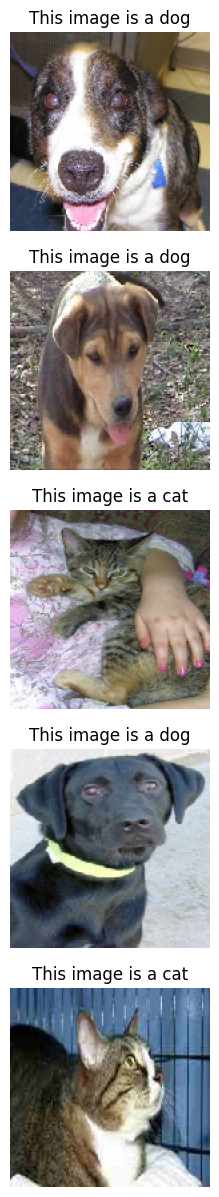

In [37]:
imageplotting(training_sample_images[:5], training_sample_labels[:5])

In [38]:
# Do some data augmentation to prevent overfitting 

train_image_generator = ImageDataGenerator(rescale = 1/255,
                                           rotation_range = 20,
                                           width_shift_range=0.2,
                                           height_shift_range=0.2,
                                           shear_range=0.2,
                                           zoom_range=0.2,
                                           horizontal_flip=True,
                                           fill_mode = "reflect")

In [39]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

Found 2000 images belonging to 2 classes.


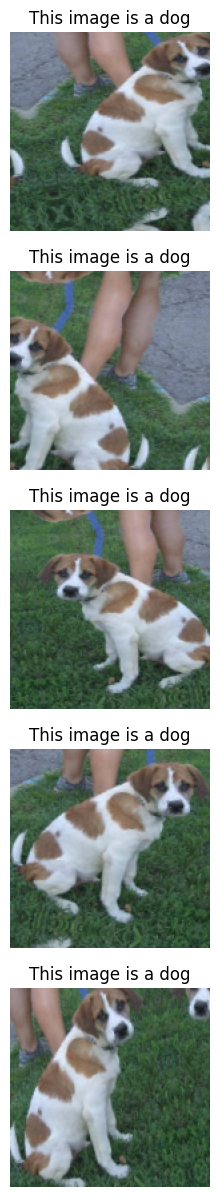

In [48]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
augmented_images_labels = [train_data_gen[0][1][0] for i in range(5)]

imageplotting(augmented_images, augmented_images_labels)

In [50]:
# Building model 

model = Sequential()

model.add(Conv2D(32, (3,3), activation = "relu", input_shape = train_data_gen.image_shape))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3,3), activation = "relu"))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(128, activation = "relu"))
model.add(Dense(64, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(loss = "binary_crossentropy",
              optimizer = "adam",
              metrics = ["accuracy"])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 82944)             0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [51]:
STEPS_PER_EPOCH = train_data_gen.n // train_data_gen.batch_size
VALIDATION_STEPS = val_data_gen.n // val_data_gen.batch_size
VALIDATION_STEPS, STEPS_PER_EPOCH

(7, 15)

In [52]:
history = model.fit(x = train_data_gen,
                    batch_size = batch_size,
                    epochs = epochs,
                    validation_data = val_data_gen,
                    steps_per_epoch = STEPS_PER_EPOCH,
                    validation_steps = VALIDATION_STEPS)

Epoch 1/15
15/15 [==============================] - 59s 4s/step - loss: 1.5483 - accuracy: 0.4925 - val_loss: 0.7103 - val_accuracy: 0.5011
Epoch 2/15
15/15 [==============================] - 60s 4s/step - loss: 0.6957 - accuracy: 0.4931 - val_loss: 0.6926 - val_accuracy: 0.5391
Epoch 3/15
15/15 [==============================] - 62s 4s/step - loss: 0.6914 - accuracy: 0.5358 - val_loss: 0.6895 - val_accuracy: 0.5737
Epoch 4/15
15/15 [==============================] - 62s 4s/step - loss: 0.6846 - accuracy: 0.5833 - val_loss: 0.6799 - val_accuracy: 0.5279
Epoch 5/15
15/15 [==============================] - 59s 4s/step - loss: 0.6714 - accuracy: 0.5839 - val_loss: 0.6620 - val_accuracy: 0.5725
Epoch 6/15
15/15 [==============================] - 62s 4s/step - loss: 0.6522 - accuracy: 0.6167 - val_loss: 0.6472 - val_accuracy: 0.6283
Epoch 7/15
15/15 [==============================] - 60s 4s/step - loss: 0.6481 - accuracy: 0.6335 - val_loss: 0.6617 - val_accuracy: 0.6261
Epoch 8/15
15/15 [==

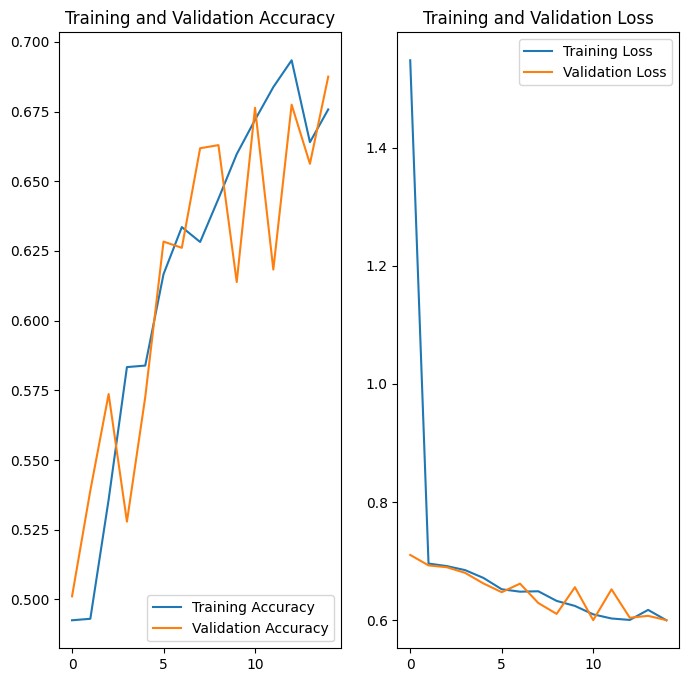

In [53]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [54]:
y_pred = model.predict(test_data_gen)
y_pred_list = y_pred.flatten().tolist()
probabilities = []
for proba in y_pred_list:
  if proba >= 0.5:
    probabilities.append(1)
  else:
    probabilities.append(0)

50/50 [==============================] - 1s 15ms/step


TypeError: 'AxesSubplot' object is not iterable

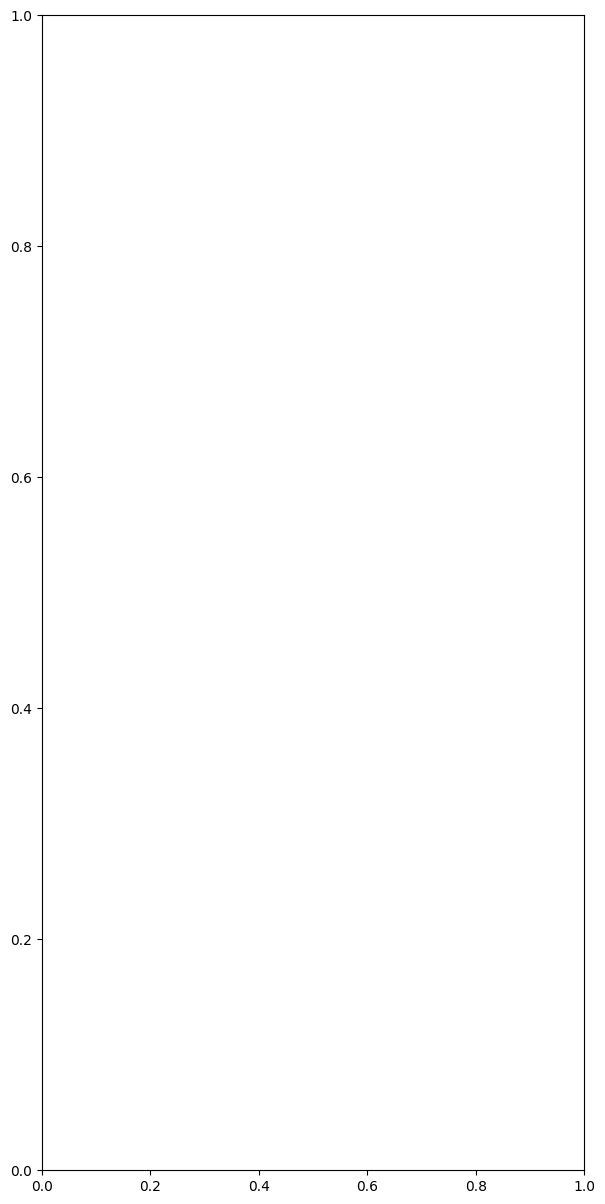

In [55]:
test_images, _ = next(test_data_gen)
imageplotting(test_images, probabilities)

In [56]:
answers =  [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
            1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
            1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
            1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
            0, 0, 0, 0, 0, 0]

correct = 0

for probability, answer in zip(probabilities, answers):
  if round(probability) == answer:
    correct +=1

percentage_identified = (correct / len(answers)) * 100

passed_challenge = percentage_identified >= 63

print(f"The model correctly identified {round(percentage_identified, 2)}% of the images of cats and dogs.")

The model correctly identified 58.0% of the images of cats and dogs.
